In [ ]:
## Create Latitude and Longitude Combinations

In [75]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [76]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [77]:
#Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [78]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [79]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

souillac mu
busselton au
neiafu to
punta arenas cl
pisco pe
atuona pf
carnarvon au
busselton au
punta arenas cl
fortuna us
ji-parana br
ossora ru
avarua ck
vila velha br
puerto madryn ar
angoche mz
hithadhoo mv
chagda ru
taltal cl
jamestown sh
bredasdorp za
mataura pf
baykit ru
saint-philippe re
dinsor so
attawapiskat ca
tasiilaq gl
bambous virieux mu
vaini to
atuona pf
gamba ga
ushuaia ar
arraial do cabo br
longyearbyen sj
warqla dz
busselton au
punta arenas cl
houma cn
bandar-e lengeh ir
mataura pf
pobe bj
fortuna us
carnarvon au
nemuro jp
avarua ck
zuya ua
englewood us
ushuaia ar
imbituba br
port elizabeth za
ribeira grande pt
pousat kh
alofi nu
naze jp
busselton au
avarua ck
new norfolk au
mattru sl
saint-philippe re
atherton au
tshikapa cd
ushuaia ar
port alfred za
upernavik gl
mangan in
nizhneyansk ru
beringovskiy ru
kamenskoye ru
menongue ao
ushuaia ar
hirtshals dk
chiungutwa tz
vaini to
tarumovka ru
faanui pf
san patricio mx
paita pe
mys shmidta ru
jiddah sa
victoria sc
ushuaia

kodiak us
vaini to
busselton au
kodiak us
jamestown sh
tonj sd
atuona pf
hithadhoo mv
cockburn town tc
punta arenas cl
georgetown sh
kaitangata nz
cherskiy ru
hithadhoo mv
beringovskiy ru
corn island ni
cape town za
puerto ayora ec
rikitea pf
dehloran ir
quebo gw
mataura pf
geraldton au
hermanus za
vila velha br
esperance au
cape town za
mar del plata ar
hobart au
chaa-khol ru
upington za
pevek ru
airai pw
geraldton au
punta arenas cl
qaanaaq gl
saint george bm
mar del plata ar
mataura pf
thompson ca
mys shmidta ru
kaitangata nz
albany au
bedi in
souillac mu
belmonte br
ushuaia ar
dzaoudzi yt
atuona pf
bacolod ph
puerto colombia co
atuona pf
waingapu id
seoul kr
atuona pf
rikitea pf
saint-augustin ca
abu samrah qa
byron bay au
butaritari ki
hithadhoo mv
bredasdorp za
tuktoyaktuk ca
vardo no
butaritari ki
khatanga ru
saverne fr
rurrenabaque bo
ushuaia ar
naze jp
tiksi ru
sitka us
blagoyevo ru
castro cl
vaini to
coquimbo cl
mataura pf
rikitea pf
lobito ao
cape town za
inhambane mz
barrow

kapaa us
havelock us
barrow us
bredasdorp za
lucapa ao
saint-philippe re
puerto ayora ec
vardo no
shibarghan af
puerto ayora ec
san patricio mx
kaitangata nz
bluff nz
arman ru
hilo us
tuatapere nz
illapel cl
new norfolk au
port alfred za
saint-pierre pm
arraial do cabo br
kloulklubed pw
avarua ck
mataura pf
amderma ru
illoqqortoormiut gl
kaitangata nz
bengkulu id
maiduguri ng
ushuaia ar
butaritari ki
punta arenas cl
qaanaaq gl
bethel us
weston us
bredasdorp za
mar del plata ar
kamenskoye ru
along in
rungata ki
auki sb
tasiilaq gl
ushuaia ar
soe id
huancabamba pe
rikitea pf
nikolskoye ru
albany au
elat il
zhigansk ru
ponta do sol cv
lhokseumawe id
jamestown sh
tromso no
barrow us
vaini to
taolanaro mg
taolanaro mg
punta arenas cl


In [80]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

598

In [81]:
import requests
requests.__version__

'2.24.0'

In [82]:
#Create a DataFrame of City Weather Data

In [83]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime


In [84]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [85]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | souillac
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | neiafu
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | pisco
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | carnarvon
Processing Record 8 of Set 1 | fortuna
Processing Record 9 of Set 1 | ji-parana
City not found. Skipping...
Processing Record 10 of Set 1 | ossora
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | vila velha
Processing Record 13 of Set 1 | puerto madryn
Processing Record 14 of Set 1 | angoche
Processing Record 15 of Set 1 | hithadhoo
Processing Record 16 of Set 1 | chagda
City not found. Skipping...
Processing Record 17 of Set 1 | taltal
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | baykit
Processing Record 22 of Set 1 | sa

Processing Record 37 of Set 4 | colares
Processing Record 38 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 39 of Set 4 | bilibino
Processing Record 40 of Set 4 | severo-kurilsk
Processing Record 41 of Set 4 | opuwo
Processing Record 42 of Set 4 | ilulissat
Processing Record 43 of Set 4 | batavia
Processing Record 44 of Set 4 | kaitangata
Processing Record 45 of Set 4 | odienne
Processing Record 46 of Set 4 | east london
Processing Record 47 of Set 4 | sitka
Processing Record 48 of Set 4 | petropavlovsk-kamchatskiy
Processing Record 49 of Set 4 | el bagre
Processing Record 50 of Set 4 | nizwa
Processing Record 1 of Set 5 | yellowknife
Processing Record 2 of Set 5 | haysville
Processing Record 3 of Set 5 | torzhok
Processing Record 4 of Set 5 | namtsy
Processing Record 5 of Set 5 | vyazma
Processing Record 6 of Set 5 | vestmannaeyjar
Processing Record 7 of Set 5 | vihti
Processing Record 8 of Set 5 | butaritari
Processing Record 9 of Set 5 | port lincoln
Processi

Processing Record 28 of Set 8 | dehloran
Processing Record 29 of Set 8 | quebo
Processing Record 30 of Set 8 | chaa-khol
City not found. Skipping...
Processing Record 31 of Set 8 | upington
Processing Record 32 of Set 8 | bedi
Processing Record 33 of Set 8 | belmonte
Processing Record 34 of Set 8 | dzaoudzi
Processing Record 35 of Set 8 | bacolod
Processing Record 36 of Set 8 | puerto colombia
Processing Record 37 of Set 8 | seoul
Processing Record 38 of Set 8 | saint-augustin
Processing Record 39 of Set 8 | abu samrah
Processing Record 40 of Set 8 | byron bay
Processing Record 41 of Set 8 | vardo
Processing Record 42 of Set 8 | saverne
Processing Record 43 of Set 8 | rurrenabaque
Processing Record 44 of Set 8 | blagoyevo
Processing Record 45 of Set 8 | coquimbo
Processing Record 46 of Set 8 | lobito
Processing Record 47 of Set 8 | tonekabon
Processing Record 48 of Set 8 | tyukhtet
Processing Record 49 of Set 8 | mackay
Processing Record 50 of Set 8 | bengkulu
Processing Record 1 of Se

Processing Record 20 of Set 12 | bahir dar
Processing Record 21 of Set 12 | mokhotlong
Processing Record 22 of Set 12 | dmytrivka
Processing Record 23 of Set 12 | praia
Processing Record 24 of Set 12 | asau
Processing Record 25 of Set 12 | fairbanks
Processing Record 26 of Set 12 | normandin
Processing Record 27 of Set 12 | namatanai
Processing Record 28 of Set 12 | aktash
Processing Record 29 of Set 12 | aiken
Processing Record 30 of Set 12 | saint-joseph
Processing Record 31 of Set 12 | stoyba
City not found. Skipping...
Processing Record 32 of Set 12 | ngunguru
Processing Record 33 of Set 12 | lucapa
Processing Record 34 of Set 12 | shibarghan
City not found. Skipping...
Processing Record 35 of Set 12 | arman
Processing Record 36 of Set 12 | illapel
Processing Record 37 of Set 12 | saint-pierre
Processing Record 38 of Set 12 | kloulklubed
Processing Record 39 of Set 12 | maiduguri
Processing Record 40 of Set 12 | weston
Processing Record 41 of Set 12 | along
Processing Record 42 of 

In [86]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Souillac,-20.52,57.52,69.80,68,40,10.29,MU,2020-10-31 15:56:34
1,Busselton,-33.65,115.33,63.00,66,100,13.58,AU,2020-10-31 15:56:34
2,Neiafu,-18.65,-173.98,75.20,94,40,11.41,TO,2020-10-31 15:56:35
3,Punta Arenas,-53.15,-70.92,51.80,71,0,9.17,CL,2020-10-31 15:56:35
4,Pisco,-13.70,-76.22,66.20,77,40,8.05,PE,2020-10-31 15:54:18
5,Atuona,-9.80,-139.03,78.13,76,18,18.39,PF,2020-10-31 15:56:35
6,Carnarvon,-24.87,113.63,69.80,88,90,9.17,AU,2020-10-31 15:56:35
7,Fortuna,40.60,-124.16,44.60,93,1,9.17,US,2020-10-31 15:54:16
8,Ossora,59.24,163.07,32.45,96,100,2.46,RU,2020-10-31 15:56:35
9,Avarua,-21.21,-159.78,73.40,83,100,11.41,CK,2020-10-31 15:52:57


In [87]:
# Reorder the column order
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [88]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Souillac,MU,2020-10-31 15:56:34,-20.52,57.52,69.80,68,40,10.29
1,Busselton,AU,2020-10-31 15:56:34,-33.65,115.33,63.00,66,100,13.58
2,Neiafu,TO,2020-10-31 15:56:35,-18.65,-173.98,75.20,94,40,11.41
3,Punta Arenas,CL,2020-10-31 15:56:35,-53.15,-70.92,51.80,71,0,9.17
4,Pisco,PE,2020-10-31 15:54:18,-13.70,-76.22,66.20,77,40,8.05
...,...,...,...,...,...,...,...,...,...
543,Huancabamba,PE,2020-10-31 15:57:34,-5.24,-79.45,74.50,23,99,4.25
544,Elat,IL,2020-10-31 15:57:34,29.56,34.95,86.00,42,0,13.87
545,Zhigansk,RU,2020-10-31 15:57:34,66.77,123.37,-10.70,89,82,0.36
546,Lhokseumawe,ID,2020-10-31 15:57:34,5.18,97.15,79.83,80,97,2.28


In [89]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [90]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [91]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1604159854.9725142

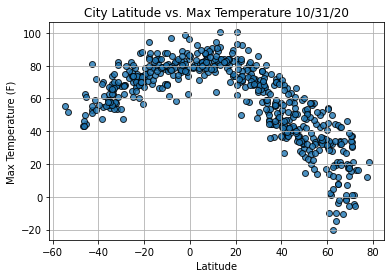

In [92]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

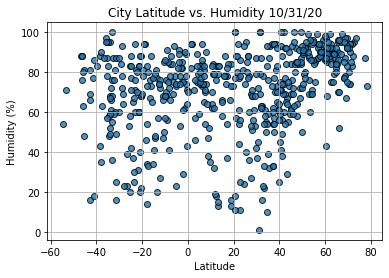

In [93]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

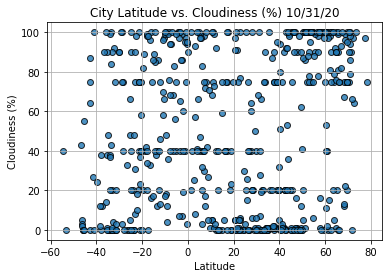

In [94]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


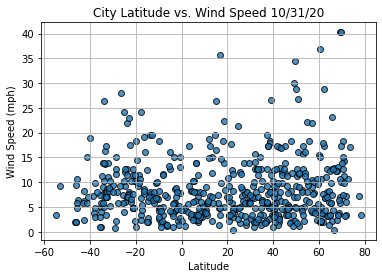

In [95]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [96]:
#Find the Correlation Between Latitude and Maximum Temperature¶

In [97]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [98]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [99]:
# To create a new DataFrame from a current DataFrame, 
index13 = city_data_df.loc[13]
index13

City                    Hithadhoo
Country                        MV
Date          2020-10-31 15:56:36
Lat                          -0.6
Lng                         73.08
Max Temp                    83.84
Humidity                       71
Cloudiness                     94
Wind Speed                   7.72
Name: 13, dtype: object

In [100]:
# Filter a DataFrame based on a value of a row.
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3      False
4      False
       ...  
543    False
544     True
545     True
546     True
547     True
Name: Lat, Length: 548, dtype: bool

In [101]:
#Return a DataFrame with all data fitting the criteria, for latitudes greater than or equal to 0, we can use the loc method 
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
7,Fortuna,US,2020-10-31 15:54:16,40.60,-124.16,44.60,93,1,9.17
8,Ossora,RU,2020-10-31 15:56:35,59.24,163.07,32.45,96,100,2.46
15,Jamestown,US,2020-10-31 15:56:36,42.10,-79.24,37.99,74,90,6.93
18,Baykit,RU,2020-10-31 15:52:56,61.67,96.37,1.24,89,15,1.99
20,Tasiilaq,GL,2020-10-31 15:56:37,65.61,-37.64,32.00,95,90,2.24


In [102]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [103]:
#Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

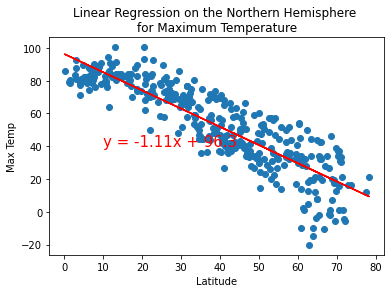

In [104]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,40))

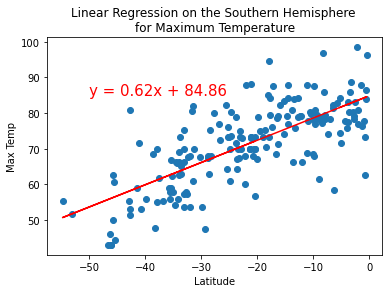

In [105]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Southern Hemisphere \nfor Maximum Temperature", 'Max Temp',(-50,85))

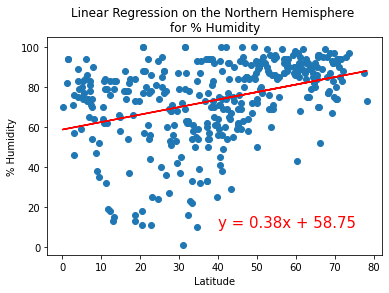

In [106]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

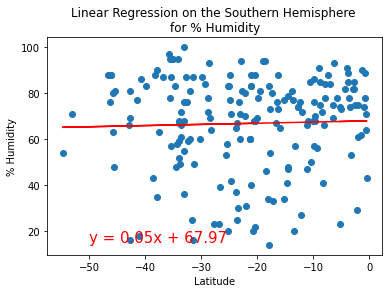

In [107]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

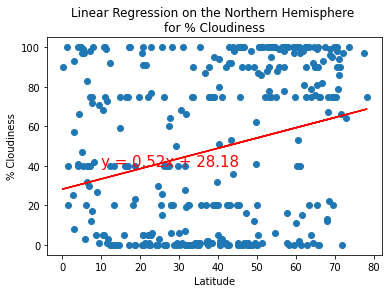

In [108]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(10,40))

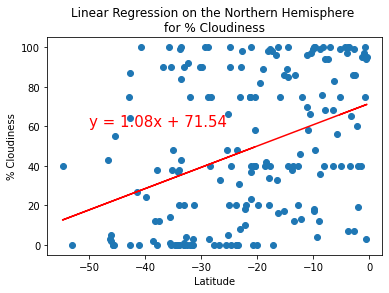

In [109]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

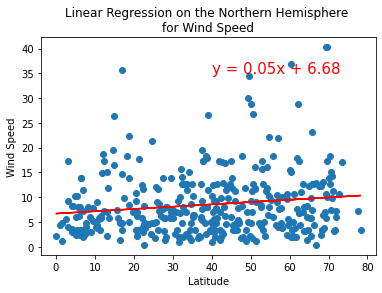

In [110]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

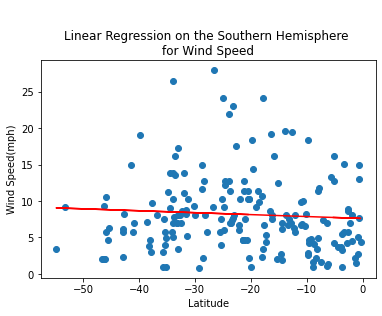

In [111]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed','Wind Speed(mph)',(-50,35))

In [112]:
##Install the gmaps Dependency

In [113]:
conda install -c conda-forge gmaps

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [114]:
pip install gmaps

Note: you may need to restart the kernel to use updated packages.
